In [1]:
import drawsvg as draw

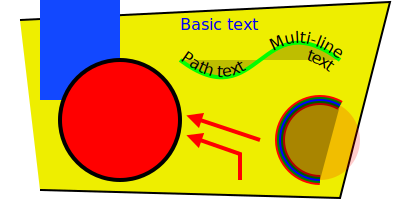

In [2]:

d = draw.Drawing(200, 100, origin='center')

# Draw an irregular polygon
d.append(draw.Lines(-80, 45,
                     70, 49,
                     95, -49,
                    -90, -40,
                    close=False,
            fill='#eeee00',
            stroke='black'))

# Draw a rectangle
r = draw.Rectangle(-80, -50, 40, 50, fill='#1248ff')
r.append_title("Our first rectangle")  # Add a tooltip
d.append(r)

# Draw a circle
d.append(draw.Circle(-40, 10, 30,
        fill='red', stroke_width=2, stroke='black'))

# Draw an arbitrary path (a triangle in this case)
p = draw.Path(stroke_width=2, stroke='lime', fill='black', fill_opacity=0.2)
p.M(-10, -20)  # Start path at point (-10, -20)
p.C(30, 10, 30, -50, 70, -20)  # Draw a curve to (70, -20)
d.append(p)

# Draw text
d.append(draw.Text('Basic text', 8, -10, -35, fill='blue'))  # 8pt text at (-10, -35)
d.append(draw.Text('Path text', 8, path=p, text_anchor='start', line_height=1))
d.append(draw.Text(['Multi-line', 'text'], 8, path=p, text_anchor='end', center=True))

# Draw multiple circular arcs
d.append(draw.ArcLine(60, 20, 20, 60, 270,
        stroke='red', stroke_width=5, fill='red', fill_opacity=0.2))
d.append(draw.Arc(60, 20, 20, 90, -60, cw=True,
        stroke='green', stroke_width=3, fill='none'))
d.append(draw.Arc(60, 20, 20, -60, 90, cw=False,
        stroke='blue', stroke_width=1, fill='black', fill_opacity=0.3))

# Draw arrows
arrow = draw.Marker(-0.1, -0.51, 0.9, 0.5, scale=4, orient='auto')
arrow.append(draw.Lines(-0.1, 0.5, -0.1, -0.5, 0.9, 0, fill='red', close=True))
p = draw.Path(stroke='red', stroke_width=2, fill='none',
        marker_end=arrow)  # Add an arrow to the end of a path
p.M(20, 40).L(20, 27).L(0, 20)  # Chain multiple path commands
d.append(p)
d.append(draw.Line(30, 20, 0, 10,
        stroke='red', stroke_width=2, fill='none',
        marker_end=arrow))  # Add an arrow to the end of a line

d.set_pixel_scale(2)  # Set number of pixels per geometry unit
#d.set_render_size(400, 200)  # Alternative to set_pixel_scale
d.save_svg('example.svg')
d.save_png('example.png')

# Display in Jupyter notebook
#d.rasterize()  # Display as PNG
d  # Display as SVG

In [45]:
class SPlotter:
    def __init__(self, size, canvas=None, rect=None, pixel_scale=1):
        """
        size: (width, height) of the plot in device coordinates
        canvas: (x_min, y_min, x_max, y_max) of the plot in device coordinates, must be within size
        rect: (x_min, y_min, x_max, y_max) of the plot in data coordinates, gets mapped to canvas
        """
        if canvas is None:
            canvas = (0, 0, size[0], size[1])
        else:
            if canvas[0] < 0:
                canvas[0] = 0
            if canvas[1] < 0:
                canvas[1] = 0
            if canvas[2] > size[0]:
                canvas[2] = size[0]
            if canvas[3] > size[1]:
                canvas[3] = size[1]
        self.size = size
        self.canvas = canvas
        self.rect = rect

        self.d = draw.Drawing(size[0], size[1], origin=(0,0))
        self.pixel_scale = pixel_scale
        self.d.set_pixel_scale(pixel_scale)

    def scale_x(self, x):
        return (x - self.rect[0]) / (self.rect[2] - self.rect[0]) * (self.canvas[2] - self.canvas[0]) + self.canvas[0]
    
    def scale_y(self, y):
        return self.size[1] - ((y - self.rect[1]) / (self.rect[3] - self.rect[1]) * (self.canvas[3] - self.canvas[1]) + self.canvas[1])
    
    def scale_xc(self, x):
        return (x - self.canvas[0]) / (self.canvas[2] - self.canvas[0]) * (self.rect[2] - self.rect[0]) + self.rect[0]
    
    def scale_yc(self, y):
        return ((self.size[1] -y) - self.canvas[1]) / (self.canvas[3] - self.canvas[1]) * (self.rect[3] - self.rect[1]) + self.rect[1]
    
    def scale_point(self, x, y):
        return (self.scale_x(x), self.scale_y(y))

    def scale_pointc(self, x, y):
        return (self.scale_xc(x), self.scale_yc(y))
    
    def add_line(self, x1, y1, x2, y2):
        xc1, yc1 = self.scale_point(x1, y1)
        xc2, yc2 = self.scale_point(x2, y2)
        self.d.append(draw.Line(xc1, yc1, xc2, yc2, stroke='gray'))

    def add_linec(self, xc1, yc1, xc2, yc2):
        self.d.append(draw.Line(xc1, yc1, xc2, yc2, stroke='gray'))

    def add_axis(self, arrows=True):
        self.add_line(self.rect[0], 0, self.rect[2], 0)
        self.add_line(0, self.rect[1], 0, self.rect[3])
        arrow_height = 8
        arrow_width_h = 3
        if arrows is True:
            x_arrow_tip = (self.rect[2], 0)
            y_arrow_tip = (0, self.rect[3])
            x_arrow_tipc = self.scale_point(*x_arrow_tip)
            y_arrow_tipc = self.scale_point(*y_arrow_tip)
            for d in range(-arrow_width_h, arrow_width_h+1):
                self.add_linec(*x_arrow_tipc, x_arrow_tipc[0] - arrow_height, x_arrow_tipc[1] - d)
                self.add_linec(*y_arrow_tipc, y_arrow_tipc[0] - d, y_arrow_tipc[1] + arrow_height)
            # self.add_linec(*x_arrow_tipc, x_arrow_tipc[0] - 10, x_arrow_tipc[1] + 5)
            # self.add_linec(*y_arrow_tipc, y_arrow_tipc[0] + 5, y_arrow_tipc[1] + 10)
            


In [46]:
pl = SPlotter((800, 300), (10, 10, 790, 290),  (-10, -10, 10, 10), 1)

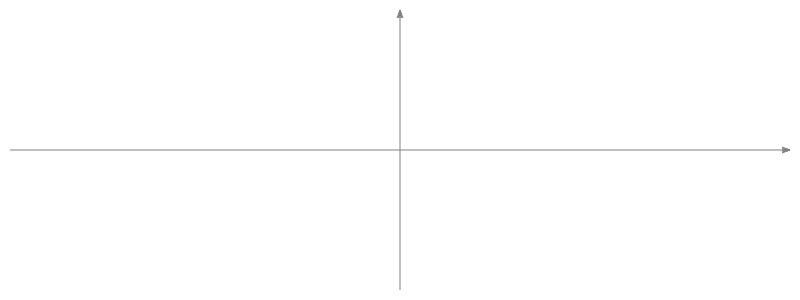

In [47]:
pl.add_axis(arrows=True)
pl.d